In [2]:
## 마르코프 체인을 활용해 임의의 도, 시별 인구 비율을 예측해본다.

In [95]:
%matplotlib inline
import math
import numpy as np  ## 백터, 행렬 데이터 전문 모듈 numpy
import pandas as pd  ## 고수준 데이터 모델 (DataFrame) 모듈 pandas
import matplotlib.pyplot as plt  ## 차트 그리기 모듈 matplotlib
import scipy.stats as stats      ## 통계 등 과학용 모듈 scipy
from matplotlib import font_manager, rc

In [96]:
# 파일 불러오고 처음 5개의 데이터만 보기

In [98]:
df = pd.read_csv("./input/move.csv",encoding = "euc-kr")
dp = pd.read_csv("./input/현재인구.csv",encoding = "euc-kr")
df.head()

,전출지별,전입지별,항목,단위,2012. 01 월,2012. 02 월,2012. 03 월,2012. 04 월,2012. 05 월,2012. 06 월,...,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,2018. 09 월,2018. 10 월,Unnamed: 86
0,서울특별시,서울특별시,이동자수,명,71818,107836,104621,95985,94388,78802,...,86159,95779,81355,82754,76542,77400,78487,62891,94388,NaN
1,서울특별시,부산광역시,이동자수,명,1389,2031,1770,1444,1201,1041,...,1591,1497,1101,962,939,989,1101,763,988,NaN
2,서울특별시,대구광역시,이동자수,명,903,1209,1084,749,688,682,...,1008,881,675,614,638,635,666,522,596,NaN
3,서울특별시,인천광역시,이동자수,명,3515,5054,4580,4225,4087,3458,...,4095,4049,3537,3459,2958,3241,3141,2395,3455,NaN
4,서울특별시,광주광역시,이동자수,명,887,1379,1213,853,718,609,...,841,856,539,585,513,577,615,457,559,NaN


In [47]:
dp.head()

,행정구역별(1),2018
0,행정구역별(1),추계인구
1,서울특별시,9721190
2,부산광역시,3418011
3,대구광역시,2459284
4,인천광역시,2942005


In [48]:
dp['행정구역별(1)']

0     행정구역별(1)
1        서울특별시
2        부산광역시
3        대구광역시
4        인천광역시
5        광주광역시
6        대전광역시
7        울산광역시
8      세종특별자치시
9          경기도
10         강원도
11        충청북도
12        충청남도
13        전라북도
14        전라남도
15        경상북도
16        경상남도
17     제주특별자치도
Name: 행정구역별(1), dtype: object

In [49]:
# column의 원소들 보기

In [50]:
df.shape

(289, 87)

In [51]:
df.columns

Index(['전출지별', '전입지별', '항목', '단위', '2012. 01 월', '2012. 02 월', '2012. 03 월',
       '2012. 04 월', '2012. 05 월', '2012. 06 월', '2012. 07 월', '2012. 08 월',
       '2012. 09 월', '2012. 10 월', '2012. 11 월', '2012. 12 월', '2013. 01 월',
       '2013. 02 월', '2013. 03 월', '2013. 04 월', '2013. 05 월', '2013. 06 월',
       '2013. 07 월', '2013. 08 월', '2013. 09 월', '2013. 10 월', '2013. 11 월',
       '2013. 12 월', '2014. 01 월', '2014. 02 월', '2014. 03 월', '2014. 04 월',
       '2014. 05 월', '2014. 06 월', '2014. 07 월', '2014. 08 월', '2014. 09 월',
       '2014. 10 월', '2014. 11 월', '2014. 12 월', '2015. 01 월', '2015. 02 월',
       '2015. 03 월', '2015. 04 월', '2015. 05 월', '2015. 06 월', '2015. 07 월',
       '2015. 08 월', '2015. 09 월', '2015. 10 월', '2015. 11 월', '2015. 12 월',
       '2016. 01 월', '2016. 02 월', '2016. 03 월', '2016. 04 월', '2016. 05 월',
       '2016. 06 월', '2016. 07 월', '2016. 08 월', '2016. 09 월', '2016. 10 월',
       '2016. 11 월', '2016. 12 월', '2017. 01 월', '2017. 02 월', '2017. 03 월',

In [52]:
dp.columns

Index(['행정구역별(1)', '2018'], dtype='object')

In [53]:
# 필요한 행만 뽑아내기

In [54]:
df2= df[['2012. 01 월', '2012. 02 월', '2012. 03 월',
       '2012. 04 월', '2012. 05 월', '2012. 06 월', '2012. 07 월', '2012. 08 월',
       '2012. 09 월', '2012. 10 월', '2012. 11 월', '2012. 12 월', '2013. 01 월',
       '2013. 02 월', '2013. 03 월', '2013. 04 월', '2013. 05 월', '2013. 06 월',
       '2013. 07 월', '2013. 08 월', '2013. 09 월', '2013. 10 월', '2013. 11 월',
       '2013. 12 월', '2014. 01 월', '2014. 02 월', '2014. 03 월', '2014. 04 월',
       '2014. 05 월', '2014. 06 월', '2014. 07 월', '2014. 08 월', '2014. 09 월',
       '2014. 10 월', '2014. 11 월', '2014. 12 월', '2015. 01 월', '2015. 02 월',
       '2015. 03 월', '2015. 04 월', '2015. 05 월', '2015. 06 월', '2015. 07 월',
       '2015. 08 월', '2015. 09 월', '2015. 10 월', '2015. 11 월', '2015. 12 월',
       '2016. 01 월', '2016. 02 월', '2016. 03 월', '2016. 04 월', '2016. 05 월',
       '2016. 06 월', '2016. 07 월', '2016. 08 월', '2016. 09 월', '2016. 10 월',
       '2016. 11 월', '2016. 12 월', '2017. 01 월', '2017. 02 월', '2017. 03 월',
       '2017. 04 월', '2017. 05 월', '2017. 06 월', '2017. 07 월', '2017. 08 월',
       '2017. 09 월', '2017. 10 월', '2017. 11 월', '2017. 12 월', '2018. 01 월',
       '2018. 02 월', '2018. 03 월', '2018. 04 월', '2018. 05 월', '2018. 06 월',
       '2018. 07 월', '2018. 08 월', '2018. 09 월', '2018. 10 월']]

In [55]:
df2

,2012. 01 월,2012. 02 월,2012. 03 월,2012. 04 월,2012. 05 월,2012. 06 월,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,...,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,2018. 09 월,2018. 10 월
0,71818,107836,104621,95985,94388,78802,79972,80951,74031,99740,...,74820,86159,95779,81355,82754,76542,77400,78487,62891,94388
1,1389,2031,1770,1444,1201,1041,1212,1343,1025,1225,...,1311,1591,1497,1101,962,939,989,1101,763,988
2,903,1209,1084,749,688,682,763,842,691,795,...,955,1008,881,675,614,638,635,666,522,596
3,3515,5054,4580,4225,4087,3458,3853,4142,3641,4556,...,3943,4095,4049,3537,3459,2958,3241,3141,2395,3455
4,887,1379,1213,853,718,609,731,746,644,790,...,763,841,856,539,585,513,577,615,457,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,84,86,54,32,45,40,40,44,35,29,...,79,112,82,70,67,58,68,57,53,68
285,87,140,105,71,79,66,73,62,86,67,...,134,131,120,112,103,68,107,92,58,121
286,47,84,62,70,63,51,48,50,59,52,...,132,134,97,94,83,60,90,122,84,81
287,147,191,121,96,88,58,72,97,79,96,...,195,199,185,102,157,131,104,160,107,165


원소가 줄어들었음을 확인한다.

In [56]:
df2.shape

(289, 82)

In [57]:
dp2=dp[['2018']]

In [58]:
dp2=dp2[1:]

In [59]:
dp2

,2018
1,9721190
2,3418011
3,2459284
4,2942005
5,1499601
6,1526825
7,1168150
8,321318
9,12955219
10,1524406


In [60]:
# 데이터를 행렬로 계산하기위해 데이터 타입을 numpy로 변경 + 행렬을 소수로 계산하기위해  datatype 도 변경

In [61]:
df2=np.array(df2).astype('float32')

In [62]:
df2=df2.astype('float32')

In [63]:
df2T=df2.T

In [64]:
markovchain=np.identity(17)

In [65]:
df2.T[0].reshape(17,17)

array([[7.1818e+04, 1.3890e+03, 9.0300e+02, 3.5150e+03, 8.8700e+02,
        1.3050e+03, 5.3100e+02, 1.5500e+02, 2.4487e+04, 1.8010e+03,
        1.1650e+03, 1.6960e+03, 1.3830e+03, 1.2610e+03, 1.2300e+03,
        1.3460e+03, 5.0600e+02],
       [1.9460e+03, 2.5438e+04, 5.1200e+02, 2.4800e+02, 1.3200e+02,
        2.2600e+02, 9.5100e+02, 3.3000e+01, 1.5420e+03, 1.8500e+02,
        1.6600e+02, 3.2000e+02, 1.4500e+02, 2.8600e+02, 9.1100e+02,
        4.8970e+03, 1.7300e+02],
       [1.1780e+03, 4.7100e+02, 1.7140e+04, 1.4900e+02, 7.8000e+01,
        2.4800e+02, 3.0600e+02, 1.3000e+01, 1.1630e+03, 1.4400e+02,
        1.6900e+02, 2.4800e+02, 8.3000e+01, 7.1000e+01, 3.6500e+03,
        8.0300e+02, 6.7000e+01],
       [2.4780e+03, 2.0600e+02, 1.4100e+02, 1.7839e+04, 1.8200e+02,
        2.5900e+02, 7.5000e+01, 4.0000e+01, 4.7460e+03, 3.9700e+02,
        3.0300e+02, 6.6800e+02, 2.9000e+02, 3.1300e+02, 2.8100e+02,
        3.2700e+02, 1.5600e+02],
       [1.0560e+03, 9.4000e+01, 4.8000e+01, 1.7100e+

In [66]:
for u in range(0,82):
    a=df2T[u].reshape(17,17)
    for i in range(0,17):
        sum=0
        for j in range(0,17):
            sum=sum+a[j][i]
        for k in range(0,17):
            a[k][i]=a[k][i]/sum
    markovchain=np.dot(markovchain,a)


In [67]:
markovchain[0]

array([0.21453022, 0.21452995, 0.21452997, 0.21453023, 0.21453028,
       0.2145302 , 0.21452998, 0.2145302 , 0.21453021, 0.21453022,
       0.2145302 , 0.21453021, 0.21453027, 0.21453024, 0.21453002,
       0.21452997, 0.21453016])

In [68]:
markovchain

array([[0.21453022, 0.21452995, 0.21452997, 0.21453023, 0.21453028,
        0.2145302 , 0.21452998, 0.2145302 , 0.21453021, 0.21453022,
        0.2145302 , 0.21453021, 0.21453027, 0.21453024, 0.21453002,
        0.21452997, 0.21453016],
       [0.0717909 , 0.07179117, 0.07179116, 0.07179088, 0.07179082,
        0.07179091, 0.07179114, 0.07179091, 0.07179089, 0.07179091,
        0.07179091, 0.07179091, 0.07179085, 0.07179086, 0.07179111,
        0.07179115, 0.07179094],
       [0.04988409, 0.04988425, 0.04988425, 0.04988408, 0.04988404,
        0.04988409, 0.04988423, 0.04988409, 0.04988408, 0.04988409,
        0.04988409, 0.04988409, 0.04988406, 0.04988406, 0.04988421,
        0.04988424, 0.04988411],
       [0.04674052, 0.04674046, 0.04674047, 0.04674053, 0.04674054,
        0.04674052, 0.04674047, 0.04674052, 0.04674052, 0.04674052,
        0.04674052, 0.04674052, 0.04674054, 0.04674053, 0.04674048,
        0.04674047, 0.04674051],
       [0.02972337, 0.02972331, 0.02972331, 0.029723

In [73]:
psum=0
for j in range(0,17):
    for i in range(0,17):
        psum=psum+markovchain[i][j]
print("{}%의 오차를 갖는다.".format(psum/17))
    

0.9999999778403323%의 오차를 갖는다.


In [75]:
dp2=dp2.astype('float32')

In [76]:
# 상태안정 행렬에 현재의 인구를 곱해 내년 변화인구를 예측하기

In [77]:
stablevector=np.dot(markovchain,dp2)

In [78]:
stablevector

array([[11077319.60639022],
       [ 3706944.40494786],
       [ 2575779.39301029],
       [ 2413458.23665766],
       [ 1534773.22326025],
       [ 1555748.79112296],
       [ 1067191.24658708],
       [   88288.04531026],
       [11823731.30572646],
       [ 1697084.2652777 ],
       [ 1374165.03061802],
       [ 1861482.11994537],
       [ 2024059.78693662],
       [ 1983617.69513047],
       [ 2912274.16310221],
       [ 3381074.0708627 ],
       [  558263.64249969]])

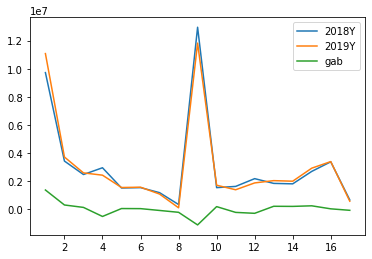

In [79]:
plt.figure()
x_name=[a+1 for a in range(17)]
y1_value=(stablevector)
y2_value=(dp2)
plt.plot(x_name,dp2,label='2018Y')
plt.plot(x_name,stablevector,label='2019Y')
plt.plot(x_name,stablevector-dp2,label = 'gab')
plt.legend()
plt.show()

In [80]:
# 그래프를 통해 서울로의 인구집중이 확연함을 볼 수 있다.
# 경기도의 경우 인구가 많아도 감소하는 추세를 보이고있다.

In [93]:
# 마코프 안정상태

In [83]:
a=np.array(dp2)
stableseoul=np.dot(markovchain,dp2)
while(1):
    a=stableseoul
    stableseoul=np.dot(markovchain,stableseoul)
    if(int(a[0])==int(stableseoul[0])):
        break
    markovchain=np.dot(markovchain,markovchain)
    
    

In [84]:
print((a[0]),(stableseoul[0]))

[11077319.60639022] [11077319.29505048]


In [85]:
stableseoul

array([[11077319.29505048],
       [ 3706944.4681754 ],
       [ 2575779.42435763],
       [ 2413458.1670018 ],
       [ 1534773.16896363],
       [ 1555748.75166693],
       [ 1067191.25962865],
       [   88288.04316973],
       [11823730.97518972],
       [ 1697084.22350387],
       [ 1374164.99705152],
       [ 1861482.07156457],
       [ 2024059.71995559],
       [ 1983617.63283864],
       [ 2912274.17827991],
       [ 3381074.11388067],
       [  558263.63193471]])

In [86]:
def later(n):
    a=stablevector
    for i in range(n):
        a=np.dot(markovchain,a)
    return a

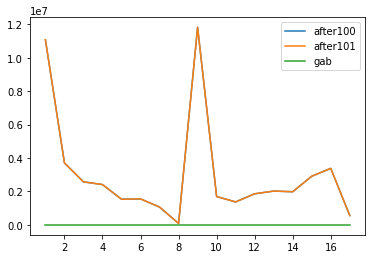

In [87]:
Y100=later(100)
Y101=later(101)
plt.figure()
x_name=[a+1 for a in range(17)]
y1_value=(Y100)
y2_value=(Y101)
plt.plot(x_name,y1_value,label='after100')
plt.plot(x_name,y2_value,label='after101')
plt.plot(x_name,y2_value-y1_value,label = 'gab')
plt.legend()
plt.show()

In [89]:
# 비율

In [90]:
stablepercent=np.zeros(17)
sum=0
for i in range(0,17):
    sum=sum+stablevector[i]
for i in range(0,17):
    stablepercent[i]=stablevector[i]/sum


In [91]:
stablepercent

array([0.21453016, 0.07179096, 0.04988412, 0.04674051, 0.02972336,
       0.03012958, 0.02066788, 0.00170984, 0.22898563, 0.03286677,
       0.02661292, 0.0360506 , 0.03919918, 0.03841596, 0.05640089,
       0.06547995, 0.01081168])

In [92]:
# 2018년 10월 인구를 기준으로, 서울의 인구가 전체의 약 21%가 밀집해 있을경우, 인구이동의 행렬이 안정화를 그리게 됨을 알수있다.